In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder as One
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc_sc
from sklearn.metrics import confusion_matrix as con_mat
from keras.models import Sequential
from keras.layers import Dense
import os
import pickle5

Using TensorFlow backend.
C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
df = pd.read_csv('./Avalanche.csv')
cpus = os.cpu_count()
print(cpus)

4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Slope            204 non-null    int64 
 1   Forest Density   204 non-null    object
 2   Snow Density     204 non-null    int64 
 3   Air Temperature  204 non-null    int64 
 4   Wind             204 non-null    int64 
 5   Prediction       204 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.7+ KB


In [4]:
df.describe()

,Slope,Snow Density,Air Temperature,Wind,Prediction
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,44.024510,39.553922,-9.289216,22.411765,1.049020
std,19.045044,24.485082,15.023452,11.815789,0.773673
min,12.000000,1.000000,-34.000000,6.000000,0.000000
25%,33.000000,16.000000,-22.000000,11.000000,0.000000
50%,36.000000,42.000000,-10.500000,22.000000,1.000000
75%,59.000000,61.000000,6.000000,35.000000,2.000000
max,80.000000,78.000000,15.000000,40.000000,2.000000


In [5]:
df

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0
...,...,...,...,...,...,...
199,34,M,44,6,6,0
200,34,L,73,-34,13,2
201,34,M,33,13,35,1
202,34,L,51,-4,35,1


In [6]:
df.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

In [7]:
df.corr()

,Slope,Snow Density,Air Temperature,Wind,Prediction
Slope,1.000000,0.066079,0.065655,-0.043279,0.487693
Snow Density,0.066079,1.000000,-0.046312,0.066345,0.454154
Air Temperature,0.065655,-0.046312,1.000000,0.077987,-0.200510
Wind,-0.043279,0.066345,0.077987,1.000000,-0.014613
Prediction,0.487693,0.454154,-0.200510,-0.014613,1.000000


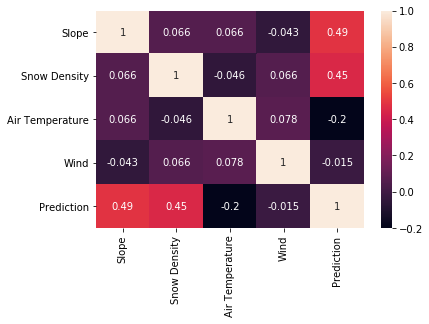

In [8]:
sns.heatmap(df.corr(),annot= True)

In [9]:
ct = ColumnTransformer([('one',One(),[1])],remainder='passthrough')
df = ct.fit_transform(df)

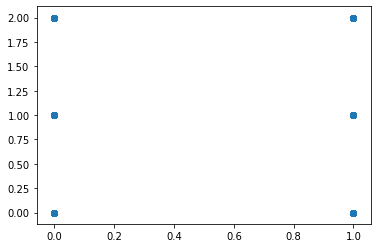

In [10]:
plt.scatter(df[:,0],df[:,-1])

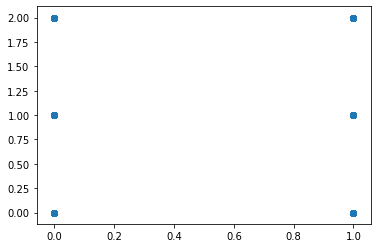

In [11]:
plt.scatter(df[:,1],df[:,-1])

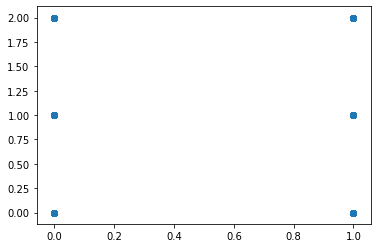

In [12]:
plt.scatter(df[:,2],df[:,-1])

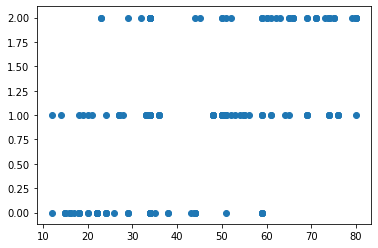

In [13]:
plt.scatter(df[:,3],df[:,-1])

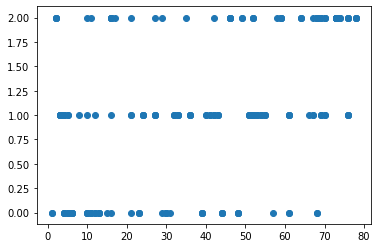

In [14]:
plt.scatter(df[:,4],df[:,-1])

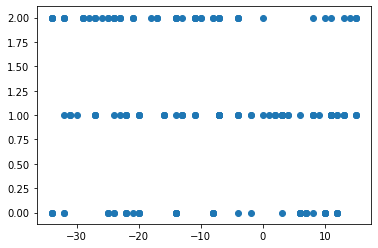

In [15]:
plt.scatter(df[:,5],df[:,-1])

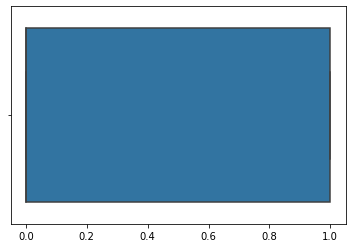

In [16]:
sns.boxplot(df[:,2])

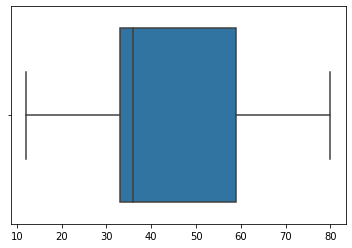

In [17]:
sns.boxplot(df[:,3])

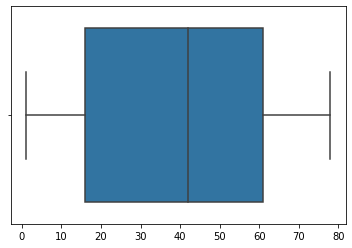

In [18]:
sns.boxplot(df[:,4])

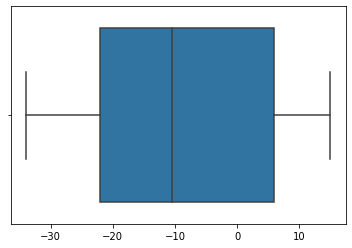

In [19]:
sns.boxplot(df[:,5])

In [20]:
x,y = df[:,1:-1],df[:,-1]
print(x)
print(y)

[[  0.   0.  59.  52. -17.  19.]
 [  1.   0.  24.  23.  -8.  19.]
 [  0.   0.  15.  30.   7.  19.]
 ...
 [  0.   1.  34.  33.  13.  35.]
 [  1.   0.  34.  51.  -4.  35.]
 [  0.   1.  34.  59. -29.   8.]]
[2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 0. 0.
 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 0. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 0. 1. 2.
 0. 1. 2. 1. 0. 1. 1. 0. 0. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0.
 1. 1. 2. 0. 2. 0. 0. 1. 1. 2. 1. 2. 1. 1. 1. 0. 2. 0. 1. 1. 1. 2. 2. 1.
 2. 1. 2. 2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1.
 1. 2. 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0. 1. 1. 2. 0. 2. 2. 1.
 0. 0. 1. 0. 1. 1. 0. 2. 1. 2. 0. 2. 2. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 2.
 0. 0. 1. 0. 1. 2. 1. 0. 2. 1. 1. 2.]


In [21]:
z = np.abs(stats.zscore(df))
outliers = np.where(z>3)
outliers

(array([], dtype=int64), array([], dtype=int64))

In [22]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2,random_state = 0)
x_val,x_test,y_val,y_test = tts(x_test,y_test,test_size = 0.5,random_state=0)

In [23]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 0,criterion='entropy')
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
y_tpred = rf.predict(x_test)
y_vpred = rf.predict(x_val)

In [25]:
print(y_tpred)
print(y_vpred)

[1. 0. 1. 1. 0. 1. 0. 1. 0. 2. 1. 0. 0. 2. 0. 0. 1. 1. 0. 0. 2.]
[0. 1. 1. 1. 0. 1. 2. 0. 0. 2. 2. 1. 1. 2. 0. 1. 0. 1. 2. 1.]


In [26]:
print(y_test)
print(y_val)

[1. 0. 2. 1. 0. 1. 0. 1. 0. 2. 1. 1. 0. 2. 0. 0. 1. 1. 0. 1. 2.]
[0. 1. 1. 1. 1. 1. 2. 0. 0. 2. 2. 1. 1. 2. 0. 1. 0. 1. 2. 1.]


In [27]:
acc_t_rf = acc_sc(y_test,y_tpred)
acc_v_rf = acc_sc(y_val,y_vpred)

In [28]:
print(acc_t_rf)
print(acc_v_rf)

0.8571428571428571
0.95


In [29]:
cm_t = con_mat(y_test,y_tpred)
cm_v = con_mat(y_val,y_vpred)
print(cm_t)
print(cm_v)

[[8 0 0]
 [2 7 0]
 [0 1 3]]
[[5 0 0]
 [1 9 0]
 [0 0 5]]


In [30]:
pickle5.dump(rf,open('./rand_fores_model.sav','wb'))